In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata


from matplotlib.patches import Patch
import pickle
import pandas as pd
import networkx as nx

pd.set_option('display.max_rows', None)

In [2]:
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)
    G_multi_directed.name = 'G_multi_directed'

In [3]:
import numpy as np
# Calculate the degree of each node in the graph and store them in a list
node_degrees = [degree for node, degree in G_multi_directed.degree()]

# Calculate the median of the node degrees
median_node_degree = np.median(node_degrees)

print("Median Node Degree:", median_node_degree)

Median Node Degree: 3.0


# PLOT SPECIFIC NODES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The flow type of node SEQ_369__L_LMGN is {'id': 'SEQ_369__L_LMGN', 'name': 'SEQ_369__L_LMGN', 'source_id': "['RU_4486']", 'node_id': "['SEQ_369__L_LMGN']", 'lat': 53.69563, 'long': 39.26323, 'country_code': 'RU', 'comment': nan, 'tags': '{}', 'nuts_id_1': 'RU', 'nuts_id_2': 'RU', 'nuts_id_3': 'RU', 'uncertainty_nuts_id_1': 0, 'uncertainty_nuts_id_2': 0, 'uncertainty_nuts_id_3': 0, 'method_nuts_id_1': 'M_Consumers.add_Nuts_Num()', 'method_nuts_id_2': 'M_Consumers.add_Nuts_Num()', 'method_nuts_id_3': 'M_Consumers.add_Nuts_Num()', 'type': 'node', 'flow_type': 'transit'}
The flow type of node N_193_M_LMGN is {'id': 'N_193_M_LMGN', 'name': 'N_193_M_LMGN', 'source_id': "['LT_2484']", 'node_id': "['N_193_M_LMGN']", 'lat': 55.02199, 'long': 25.0735, 'country_code': 'LT', 'comment': nan, 'tags': '{}', 'nuts_id_1': 'LT0', 'nuts_id_2': 'LT01', 'nuts_id_3': 'LT011', 'uncertainty_nuts_id_1': 0, 'uncertainty_nuts_id_2': 0, 'uncertainty_nuts_id_3': 0, 'method_nuts_id_1': 'M_Consumers.add_Nuts_Num()',

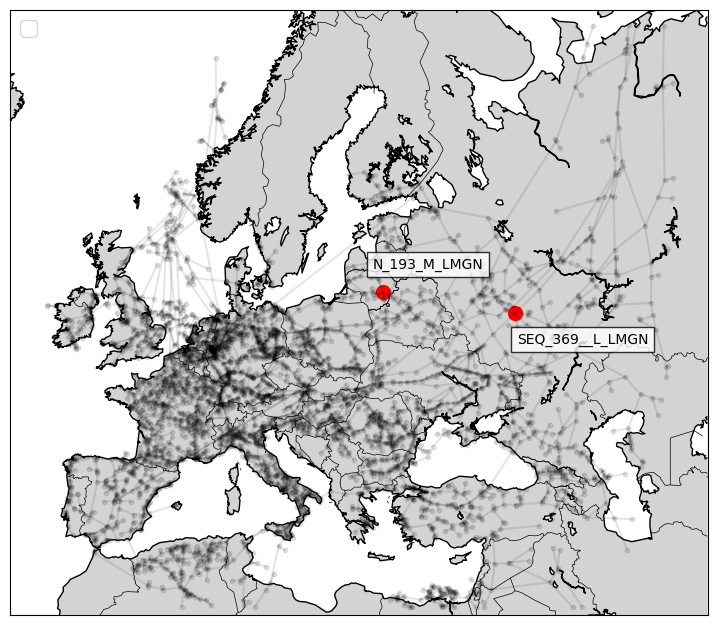

In [4]:
lats = [G_multi_directed.nodes[node]['lat'] for node in G_multi_directed.nodes()]
lons = [G_multi_directed.nodes[node]['long'] for node in G_multi_directed.nodes()]


plt.figure(figsize=(9, 10)) 

# Plot the map

m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the points themselves
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10, alpha=0.1) 


# Plot the all the edges in G_multi_directed
for u, v in G_multi_directed.edges():
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'k-', alpha=0.1)

plt.legend(loc='upper left', fontsize=15)  

# PLOT NODE
node = 'SEQ_369__L_LMGN'
x, y = m(G_multi_directed.nodes[node]['long'], G_multi_directed.nodes[node]['lat'])
m.scatter(x, y, c='red', marker='o', s=100)
plt.text(x+1600000, y-400000, node, fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.8))
print(f'The flow type of node {node} is {G_multi_directed.nodes[node]}')

# PLOT NODE
node = 'N_193_M_LMGN'
x, y = m(G_multi_directed.nodes[node]['long'], G_multi_directed.nodes[node]['lat'])
m.scatter(x, y, c='red', marker='o', s=100)
plt.text(x + 1200000, y+250000, node, fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.8))
print(f'The flow type of node {node} is {G_multi_directed.nodes[node]}')


plt.show()


# PLOT SPECIFIC EDGES

### 6.3.2

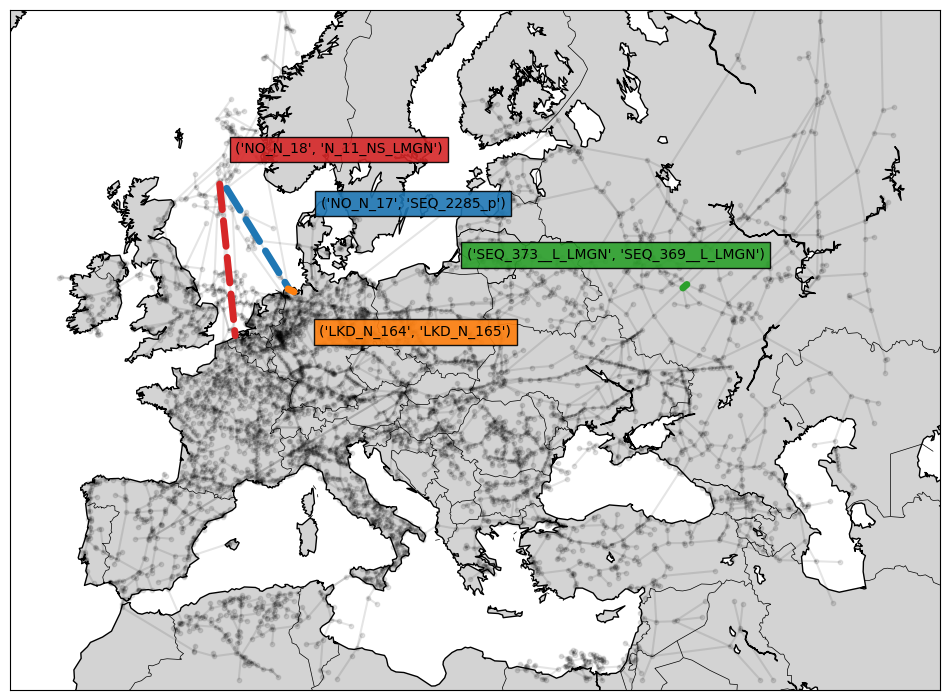

In [10]:
import matplotlib.colors as mcolors

common_edges = [('N_539_M_LMGN','SEQ_7053__M_LMGN'),
('SEQ_8285__L_LMGN','SEQ_2025__L_LMGN'), ('SEQ_369__L_LMGN', 'SEQ_373__L_LMGN'),
('SEQ_10361__M_LMGN','N_183_L_LMGN')]

common_edges = [('NO_N_17', 'SEQ_2285_p'), ('LKD_N_164',
'LKD_N_165'), ('SEQ_373__L_LMGN', 'SEQ_369__L_LMGN'), ('NO_N_18', 'N_11_NS_LMGN')]

plt.figure(figsize=(12, 10)) 

# Plot the map
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=65, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

lats = [G_multi_directed.nodes[node]['lat'] for node in G_multi_directed.nodes()]
lons = [G_multi_directed.nodes[node]['long'] for node in G_multi_directed.nodes()]

# Plot the points themselves
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10, alpha=0.1) 

# Plot all the edges in G_multi_directed
for u, v in G_multi_directed.edges():
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'k-', alpha=0.1)

# Generate a list of unique colors
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot the common edges with unique colors
for i, edge in enumerate(common_edges):
    u, v = edge
    color = colors[i % len(colors)]  # Cycle through the colors list
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, color=color, linewidth=5,  zorder=10, linestyle='dashed', dash_capstyle='round', dash_joinstyle='round')

    # Prevent overlapping text
    if edge == ('SEQ_10361__M_LMGN', 'N_183_L_LMGN'):
        plt.text(x[0]+2000000, y[0]+400000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))
    elif edge == ('NO_N_18', 'N_11_NS_LMGN'):
        plt.text(x[0]+2000000, y[0]+250000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))

    elif edge == ('NO_N_17', 'SEQ_2285_p'):
        plt.text(x[0]+2500000, y[0]-200000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))
    elif edge == ('SEQ_373__L_LMGN', 'SEQ_369__L_LMGN'):
        plt.text(x[0]+700000, y[0]+200000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))


    else:
        plt.text(x[0]+2000000, y[0]-450000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))


plt.savefig('latex_figures/selected_edges.svg')
plt.show()

In [ ]:
def find_num_paths_to_sinks(G, edge):
    u, v = edge
    count = 0
    paths = 0
    for node in G.nodes(data=True):
        data = node[1]
        flow_type = data['flow_type']
        if flow_type == 'sink':
            if nx.has_path(G, v, node[0]):
                paths += 1
        count += 1  
    return paths

# Define a function that finds number of paths from sources to the start of the edge
def find_num_paths_from_sources(G, edge):
    u, v = edge
    count = 0
    paths = 0
    for node in G.nodes(data=True):
        data = node[1]
        flow_type = data['flow_type']
        if flow_type == 'source':
            if nx.has_path(G, node[0], u):
                paths += 1
        count += 1  
    return paths


In [ ]:
paths_from_sources = find_num_paths_from_sources(G_multi_directed, ('SEQ_10361__M_LMGN','N_183_L_LMGN'))
paths_to_sinks = find_num_paths_to_sinks(G_multi_directed, ('SEQ_10361__M_LMGN','N_183_L_LMGN'))
print("Number of paths from sources to the start of the edge: ", paths_from_sources)
print("Number of paths from the edge to sinks: ", paths_to_sinks)
print()
paths_from_sources = find_num_paths_from_sources(G_multi_directed, ('SEQ_369__L_LMGN', 'SEQ_373__L_LMGN'))
paths_to_sinks = find_num_paths_to_sinks(G_multi_directed, ('SEQ_369__L_LMGN', 'SEQ_373__L_LMGN'))
print("Number of paths from sources to the start of the edge: ", paths_from_sources)
print("Number of paths from the edge to sinks: ", paths_to_sinks)
print()
paths_from_sources = find_num_paths_from_sources(G_multi_directed, ('SEQ_8285__L_LMGN','SEQ_2025__L_LMGN'))
paths_to_sinks = find_num_paths_to_sinks(G_multi_directed, ('SEQ_8285__L_LMGN','SEQ_2025__L_LMGN'))
print("Number of paths from sources to the start of the edge: ", paths_from_sources)
print("Number of paths from the edge to sinks: ", paths_to_sinks)
print()
paths_from_sources = find_num_paths_from_sources(G_multi_directed, ('N_539_M_LMGN','SEQ_7053__M_LMGN'))
paths_to_sinks = find_num_paths_to_sinks(G_multi_directed, ('N_539_M_LMGN','SEQ_7053__M_LMGN'))
print("Number of paths from sources to the start of the edge: ", paths_from_sources)
print("Number of paths from the edge to sinks: ", paths_to_sinks)

"""
Output:

Number of paths from sources to the start of the edge:  25
Number of paths from the edge to sinks:  24

Number of paths from sources to the start of the edge:  25
Number of paths from the edge to sinks:  24

Number of paths from sources to the start of the edge:  25
Number of paths from the edge to sinks:  24

Number of paths from sources to the start of the edge:  22
Number of paths from the edge to sinks:  312
"""

In [ ]:
import networkx as nx
from collections import defaultdict

# Define a function that creates a histogram of the number of paths to sinks for all nodes
def find_path_histogram_to_sinks(G):
    path_counts = defaultdict(int)
    
    count  = 0
    for target in G.nodes():

        # Skip target if its out-degree is 0
        if G.out_degree(target) == 0:
            continue

        num_paths = 0
        for node, data in G.nodes(data=True):
            if data['flow_type'] == 'sink':
                if nx.has_path(G, target, node):
                    num_paths += len(list(nx.all_shortest_paths(G, target, node)))
        path_counts[num_paths] += 1
        count += 1
                
    return dict(path_counts)

# Define a function that creates a histogram of the number of paths from sources for all nodes
def find_path_histogram_from_sources(G):
    path_counts = defaultdict(int)

    count=0
    for target in G.nodes():
         # Skip target if its in-degree is 0
        if G.in_degree(target) == 0:
            continue
        
        num_paths = 0
        for node, data in G.nodes(data=True):
            if data['flow_type'] == 'source':
                if nx.has_path(G, node, target):
                    num_paths += len(list(nx.all_shortest_paths(G, node, target)))
        path_counts[num_paths] += 1
        count += 1
                
    return dict(path_counts)

In [ ]:
to_sinks_histogram = find_path_histogram_to_sinks(G_multi_directed)
from_sources_histogram = find_path_histogram_from_sources(G_multi_directed)

In [ ]:
def calculate_median(path_counts):
    total_elements = sum(path_counts.values())
    median_index = total_elements // 2
    
    sorted_keys = sorted(path_counts.keys())
    
    cumulative_sum = 0
    median_values = []
    
    for key in sorted_keys:
        cumulative_sum += path_counts[key]
        if cumulative_sum >= median_index:
            median_values.append(key)
            if total_elements % 2 == 0 and cumulative_sum >= median_index + 1:
                # If the total number of elements is even, get the next value for the second median
                median_values.append(key)
            break
    
    if len(median_values) == 1:
        return median_values[0]
    else:
        return sum(median_values) / 2.0

In [ ]:
for e in common_edges:
    print(e in G_multi_directed.edges())

In [ ]:
def edge_betweenness_centrality_stats(G, specific_edges):
    """
    Compute the median and average betweenness centrality of all edges in the graph G.
    Also print betweenness centrality of the specified edges in specific_edges.

    Parameters:
    G (networkx.Graph): The input graph.
    specific_edges (list): List of edges (tuples) for which to print the betweenness centrality.

    Returns:
    tuple: (median_betweenness, average_betweenness)
    """
    # Compute edge betweenness centrality for all edges
    edge_betweenness = nx.edge_betweenness_centrality(G, weight='max_cap_M_m3_per_d')
    edge_betweenness = { (u, v): bc for (u, v, _), bc in edge_betweenness.items() }

    
    # Get the betweenness centrality values
    betweenness_values = list(edge_betweenness.values())
    
    # Compute median and average betweenness centrality
    median_betweenness = np.median(betweenness_values)
    average_betweenness = np.mean(betweenness_values)
    

    print(edge_betweenness)
    # Print betweenness centrality of the specified edges
    for edge in specific_edges:
        if edge in edge_betweenness:
            print(f"Betweenness centrality for edge {edge}: {edge_betweenness[edge]}")
        else:
            print(f"Edge {edge} is not in the graph.")
    
    return median_betweenness, average_betweenness

In [ ]:
median_betweenness, average_betweenness = edge_betweenness_centrality_stats(G_multi_directed, common_edges)

"""
Betweenness centrality for edge ('N_539_M_LMGN', 'SEQ_7053__M_LMGN'): 4.85e-03
Betweenness centrality for edge ('SEQ_8285__L_LMGN', 'SEQ_2025__L_LMGN'): 1.64e-03
Betweenness centrality for edge ('SEQ_369__L_LMGN', 'SEQ_373__L_LMGN'): 1.11e-03
Betweenness centrality for edge ('SEQ_10361__M_LMGN', 'N_183_L_LMGN'): 1.49e-03

Median Betweenness Centrality: 1.60e-05
Average Betweenness Centrality: 4.91e-04
"""

In [ ]:
median_to_sinks = calculate_median(to_sinks_histogram)
median_from_sources = calculate_median(from_sources_histogram)

""" 
Output: (6.0, 3)
"""
median_to_sinks, median_from_sources

----

In [ ]:
top_5_FC_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/FC_edge_removal_df.pkl').iloc[1:6]
top_5_FC_edges['removed_entity'] = top_5_FC_edges['removed_entity'].apply(lambda edge: tuple(edge))

top_5_FCR_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/FCR_edge_removal_df.pkl').iloc[1:6]
top_5_FCR_edges['removed_entity'] = top_5_FCR_edges['removed_entity'].apply(lambda edge: tuple(edge))

top_5_WFCR_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/WFCR_edge_removal_df.pkl').iloc[1:6]
top_5_WFCR_edges['removed_entity'] = top_5_WFCR_edges['removed_entity'].apply(lambda edge: tuple(edge))

In [ ]:
for i, edge in top_5_FC_edges.iterrows():
    if edge['removed_entity'] not in G_multi_directed.edges():
        # Reverse the edge
        reversed_edge = (edge['removed_entity'][1], edge['removed_entity'][0])
        
        # Update the dataframe
        top_5_FC_edges.at[i, 'removed_entity'] = reversed_edge



for i, edge in top_5_FCR_edges.iterrows():
    if edge['removed_entity'] not in G_multi_directed.edges():
        # Reverse the edge
        reversed_edge = (edge['removed_entity'][1], edge['removed_entity'][0])
        
        # Update the dataframe
        top_5_FCR_edges.at[i, 'removed_entity'] = reversed_edge

for i, edge in top_5_WFCR_edges.iterrows():
    if edge['removed_entity'] not in G_multi_directed.edges():
        # Reverse the edge
        reversed_edge = (edge['removed_entity'][1], edge['removed_entity'][0])
        
        # Update the dataframe
        top_5_WFCR_edges.at[i, 'removed_entity'] = reversed_edge


print(top_5_FC_edges[['removed_entity', 'capacity_robustness_max_flow']])
print(top_5_FCR_edges[['removed_entity', 'capacity_robustness_max_flow']])
print(top_5_WFCR_edges[['removed_entity', 'capacity_robustness_max_flow']])

In [ ]:
# For each of the top 5 edges removed in each of the three scenarios, plot the edges on a map of europe and label the edge
plt.figure(figsize=(9, 10))
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')


for i, edge in top_5_FC_edges.iterrows():
    u, v = edge['removed_entity']
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'orange', linewidth=5)

    # Highlight the source and destination nodes
    # m.scatter(x[0], y[0], c='red', marker='o', s=100)
    # m.scatter(x[1], y[1], c='green', marker='o', s=100)
    
    plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='orange')

plt.legend(loc='upper left', fontsize=15)
plt.show()

plt.figure(figsize=(9, 10))
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

for i, edge in top_5_FCR_edges.iterrows():
    u, v = edge['removed_entity']
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'g-', linewidth=5)

    # Highlight the source and destination nodes
    # m.scatter(x[0], y[0], c='red', marker='o', s=100)
    # m.scatter(x[1], y[1], c='green', marker='o', s=100)
    
    plt.text(x[0], y[0], f'{u} -> {v}', fontsize=8, color='green', bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white"))

plt.legend(loc='upper left', fontsize=15)
plt.show()

plt.figure(figsize=(9, 10))
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

for i, edge in top_5_WFCR_edges.iterrows():
    u, v = edge['removed_entity']
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'r-', linewidth=5)    

    # Highlight the source and destination nodes
    # m.scatter(x[0], y[0], c='red', marker='o', s=100)
    # m.scatter(x[1], y[1], c='green', marker='o', s=100)





    plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='red')

plt.legend(loc='upper left', fontsize=15)
plt.show()


## FCR plateau observed in removal plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pickle

In [ ]:
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)
    G_multi_directed.name = 'G_multi_directed'

In [ ]:
FC_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/FC_edge_removal_df.pkl').iloc[1:12]
FCR_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/FCR_edge_removal_df.pkl').iloc[1:12]
WFCR_edges = pd.read_pickle('results/max_flow/iggielgn/hybrid/WFCR_edge_removal_df.pkl').iloc[1:12]

# Plot the top 10 removals for each scenario with iterations on x-axis and flow_robustness_capacity on y-axis
plt.figure(figsize=(10, 6))
plt.plot(FC_edges.index, FC_edges['capacity_robustness_max_flow'], label='FC', marker='o')
plt.plot(FCR_edges.index, FCR_edges['capacity_robustness_max_flow'], label='FCR', marker='o')
plt.plot(WFCR_edges.index, WFCR_edges['capacity_robustness_max_flow'], label='WFCR', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Flow Capacity')
plt.legend()
plt.show()

In [ ]:
print('FC', FC_edges.head(7)[['removed_entity', 'capacity_robustness_max_flow']])
print('FCR',FCR_edges.head(11)[['removed_entity', 'capacity_robustness_max_flow']])
print('WFCR', WFCR_edges.head(10)[['removed_entity', 'capacity_robustness_max_flow']])

In [ ]:

plt.figure(figsize=(9, 10))
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')


u, v = ('LKD_N_199', 'LKD_N_104')
x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
m.plot(x, y, 'blue', linewidth=5)
plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='blue')

u, v =  ('N_272_M_LMGN', 'SEQ_10351__M_LMGN')
x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
m.plot(x, y, 'red', linewidth=5)
plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='red')

plt.legend(loc='upper left', fontsize=15)
plt.show()

In [ ]:
# Print the number of edges between  {N_183_L_LMGN, SEQ_10361__M_LMGN} in G_multi_directed
print(G_multi_directed.number_of_edges('SEQ_10361__M_LMGN', 'N_183_L_LMGN'))

# Determine the direction of the edge between {N_183_L_LMGN, SEQ_10361__M_LMGN}
print(G_multi_directed['SEQ_10361__M_LMGN']['N_183_L_LMGN'])

# {SEQ_614_p, INET_N_329} {N_193_M_LMGN, SEQ_2025_p} 
print(G_multi_directed.number_of_edges('SEQ_614_p', 'INET_N_329'))
print(G_multi_directed.number_of_edges('N_193_M_LMGN', 'SEQ_2025_p'))

print(G_multi_directed['SEQ_614_p']['INET_N_329'])
print(G_multi_directed['N_193_M_LMGN']['SEQ_2025_p'])



{0: {'id': 'LKD_PS_266_Seg_0_Seg_0', 'name': 'LKD_PS_266_Seg_0_Seg_0', 'source_id': "['LKD_385']", 'comment': nan, 'tags': '{}', 'diameter_mm': 700.0, 'end_year': None, 'is_H_gas': 1, 'is_bothDirection': 0, 'lat_mean': 53.204709, 'length_km': 22.632064, 'long_mean': 7.453424, 'max_cap_M_m3_per_d': 15.840280693066717, 'max_pressure_bar': 70.0, 'nuts_id_1': "['DE9', 'DE9']", 'nuts_id_2': "['DE94', 'DE94']", 'nuts_id_3': "['DE94C', 'DE94C']", 'path_lat': '[53.173529]', 'path_long': '[7.451287]', 'start_year': nan, 'uncertainty_diameter_mm': 0.0, 'uncertainty_end_year': nan, 'uncertainty_is_H_gas': 0.0, 'uncertainty_is_bothDirection': 0.5, 'uncertainty_lat_mean': 0.050511000000000195, 'uncertainty_length_km': 0.3333333333333333, 'uncertainty_long_mean': 0.13014699999999998, 'uncertainty_max_cap_M_m3_per_d': 0.0, 'uncertainty_max_pressure_bar': 0.0, 'uncertainty_nuts_id_1': 0.0, 'uncertainty_nuts_id_2': 0.0, 'uncertainty_nuts_id_3': 0.0, 'uncertainty_path_lat': 0.0, 'uncertainty_path_long': 0.0, 'uncertainty_start_year': nan, 'method_diameter_mm': 'raw', 'method_end_year': None, 'method_is_H_gas': 'raw', 'method_is_bothDirection': 'make_Attrib(const)', 'method_lat_mean': 'make_Attrib(latlong_mean)', 'method_length_km': 'fill_length(PipeSegments)', 'method_long_mean': 'make_Attrib(latlong_mean)', 'method_max_cap_M_m3_per_d': 'log_raw', 'method_max_pressure_bar': 'raw', 'method_nuts_id_1': 'make_Attrib(const)', 'method_nuts_id_2': 'make_Attrib(const)', 'method_nuts_id_3': 'make_Attrib(const)', 'method_path_lat': 'K_Netze.make_path_latlong(lat)', 'method_path_long': 'K_Netze.make_path_latlong(lat)', 'method_start_year': None, 'from_node_id': 'LKD_N_199', 'to_node_id': 'LKD_N_104', 'from_country_code': 'DE', 'to_country_code': 'DE', 'from_lat': 53.169788, 'to_lat': 53.27081, 'from_long': 7.584639, 'to_long': 7.324345}, 


1: {'id': 'LKD_PS_300_Seg_0_Seg_0', 'name': 'LKD_PS_300_Seg_0_Seg_0', 'source_id': "['LKD_419']", 'comment': nan, 'tags': '{}', 'diameter_mm': 1000.0, 'end_year': None, 'is_H_gas': 0, 'is_bothDirection': 0, 'lat_mean': 53.204833, 'length_km': 24.787585, 'long_mean': 7.425259, 'max_cap_M_m3_per_d': 61.37956396400001, 'max_pressure_bar': 70.0, 'nuts_id_1': "['DE9', 'DE9']", 'nuts_id_2': "['DE94', 'DE94']", 'nuts_id_3': "['DE94C', 'DE94C']", 'path_lat': '[53.181582, 53.197152]', 'path_long': '[7.450721, 7.341333]', 'start_year': nan, 'uncertainty_diameter_mm': 0.0, 'uncertainty_end_year': nan, 'uncertainty_is_H_gas': 0.0, 'uncertainty_is_bothDirection': 0.5, 'uncertainty_lat_mean': 0.050511000000000195, 'uncertainty_length_km': 0.25, 'uncertainty_long_mean': 0.13014699999999998, 'uncertainty_max_cap_M_m3_per_d': 0.0, 'uncertainty_max_pressure_bar': 0.0, 'uncertainty_nuts_id_1': 0.0, 'uncertainty_nuts_id_2': 0.0, 'uncertainty_nuts_id_3': 0.0, 'uncertainty_path_lat': 0.0, 'uncertainty_path_long': 0.0, 'uncertainty_start_year': nan, 'method_diameter_mm': 'raw', 'method_end_year': None, 'method_is_H_gas': 'raw', 'method_is_bothDirection': 'make_Attrib(const)', 'method_lat_mean': 'make_Attrib(latlong_mean)', 'method_length_km': 'fill_length(PipeSegments)', 'method_long_mean': 'make_Attrib(latlong_mean)', 'method_max_cap_M_m3_per_d': 'log_raw', 'method_max_pressure_bar': 'raw', 'method_nuts_id_1': 'make_Attrib(const)', 'method_nuts_id_2': 'make_Attrib(const)', 'method_nuts_id_3': 'make_Attrib(const)', 'method_path_lat': 'K_Netze.make_path_latlong(lat)', 'method_path_long': 'K_Netze.make_path_latlong(lat)', 'method_start_year': None, 'from_node_id': 'LKD_N_199', 'to_node_id': 'LKD_N_104', 'from_country_code': 'DE', 'to_country_code': 'DE', 'from_lat': 53.169788, 'to_lat': 53.27081, 'from_long': 7.584639, 'to_long': 7.324345}}

In [ ]:
# Print the number of edges between  'N_272_M_LMGN' and 'SEQ_10351__M_LMGN' in G_multi_directed
print(G_multi_directed.number_of_edges('N_272_M_LMGN', 'SEQ_10351__M_LMGN'))

# Determine the direction of the edge between 'N_272_M_LMGN' and 'SEQ_10351__M_LMGN'
print(G_multi_directed['N_272_M_LMGN']['SEQ_10351__M_LMGN'])

{0: {'id': 'PLM_2402_Seg_0_Seg_0', 'name': 'PLM_2402_Seg_0_Seg_0', 'source_id': "['EntsoG_Map_69008']", 'comment': nan, 'tags': '{}', 'diameter_mm': 900.0, 'end_year': None, 'is_H_gas': 1, 'is_bothDirection': 0, 'lat_mean': 54.008605, 'length_km': 51.786549, 'long_mean': 38.72301, 'max_cap_M_m3_per_d': 27.809143341935314, 'max_pressure_bar': 70.0, 'nuts_id_1': "['RU', 'RU']", 'nuts_id_2': "['RU', 'RU']", 'nuts_id_3': "['RU', 'RU']", 'path_lat': '[54.0433, 53.98531]', 'path_long': '[38.77488, 38.59299]', 'start_year': nan, 'uncertainty_diameter_mm': 249.87054361567627, 'uncertainty_end_year': nan, 'uncertainty_is_H_gas': 0.5, 'uncertainty_is_bothDirection': 0.5, 'uncertainty_lat_mean': 0.10955500000000029, 'uncertainty_length_km': 0.25, 'uncertainty_long_mean': 0.3436850000000007, 'uncertainty_max_cap_M_m3_per_d': 24.306462524672494, 'uncertainty_max_pressure_bar': 11.06611831401779, 'uncertainty_nuts_id_1': 0.0, 'uncertainty_nuts_id_2': 0.0, 'uncertainty_nuts_id_3': 0.0, 'uncertainty_path_lat': 0.0, 'uncertainty_path_long': 0.0, 'uncertainty_start_year': nan, 'method_diameter_mm': 'Median(diameter_mm)', 'method_end_year': None, 'method_is_H_gas': 'make_Attrib(const)', 'method_is_bothDirection': 'make_Attrib(const)', 'method_lat_mean': 'make_Attrib(latlong_mean)', 'method_length_km': 'fill_length(PipeSegments)', 'method_long_mean': 'make_Attrib(latlong_mean)', 'method_max_cap_M_m3_per_d': 'Median(max_cap_M_m3_per_d)', 'method_max_pressure_bar': 'Median(max_pressure_bar)', 'method_nuts_id_1': 'make_Attrib(const)', 'method_nuts_id_2': 'make_Attrib(const)', 'method_nuts_id_3': 'make_Attrib(const)', 'method_path_lat': 'K_Netze.make_path_latlong(lat)', 'method_path_long': 'K_Netze.make_path_latlong(lat)', 'method_start_year': None, 'from_node_id': 'N_272_M_LMGN', 'to_node_id': 'SEQ_10351__M_LMGN', 'from_country_code': 'RU', 'to_country_code': 'RU', 'from_lat': 54.11246, 'to_lat': 53.89335, 'from_long': 39.10577, 'to_long': 38.4184}}

In [ ]:
# Plot all Russian nodes and edges on a map of Eastern Europe. Highlight the nodes 'N_272_M_LMGN' and 'SEQ_10351__M_LMGN'
plt.figure(figsize=(9, 10))

m = Basemap(projection='merc',
            llcrnrlat=50,  # Lower-left corner latitude
            urcrnrlat=60,  # Upper-right corner latitude
            llcrnrlon=25,  # Lower-left corner longitude
            urcrnrlon=50,  # Upper-right corner longitude
            resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the points themselves
lats = [G_multi_directed.nodes[node]['lat'] for node in G_multi_directed.nodes() if 'RU' in node]
lons = [G_multi_directed.nodes[node]['long'] for node in G_multi_directed.nodes() if 'RU' in node]
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10, alpha=0.1)

# Plot the all the edges in G_multi_directed
for u, v in G_multi_directed.edges():
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'k-', alpha=0.2)
    

# Highlight the source and destination nodes
u, v =  ('N_272_M_LMGN', 'SEQ_10351__M_LMGN')
x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
m.plot(x, y, 'red', linewidth=2)
plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='red')

plt.legend(loc='upper left', fontsize=15)
plt.show()


In [ ]:
russian_node_ids = [node[0] for node in G_multi_directed.nodes(data=True) if node[1]['country_code'] == 'RU']
G_Russia = G_multi_directed.subgraph(russian_node_ids)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import FancyArrowPatch

# Plot all Russian nodes and edges on a map of Eastern Europe. Highlight the nodes 'N_272_M_LMGN' and 'SEQ_10351__M_LMGN'
plt.figure(figsize=(9, 10))

m = Basemap(projection='merc',
            llcrnrlat=52,  # Lower-left corner latitude, increase for Northward direction
            urcrnrlat=56,  # Upper-right corner latitude, decrease for Southward direction
            llcrnrlon=32,  # Lower-left corner longitude, incrase for Eastward direction
            urcrnrlon=45,  # Upper-right corner longitude, decrese for Westward direction
            resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the points themselves
lats = [node[1]['lat'] for node in G_Russia.nodes(data=True)]
lons = [node[1]['long'] for node in G_Russia.nodes(data=True)]
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10)

# Plot all the edges in G_Russia
for u, v in G_Russia.edges():
    x_start, y_start = m(G_Russia.nodes[u]['long'], G_Russia.nodes[u]['lat'])
    x_end, y_end = m(G_Russia.nodes[v]['long'], G_Russia.nodes[v]['lat'])
    m.plot([x_start, x_end], [y_start, y_end], 'k-', alpha=0.2)
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                            arrowstyle='->', color='black', linewidth=1, mutation_scale=8)  # Increased mutation_scale for larger arrows
    plt.gca().add_patch(arrow)

# Highlight the source and destination nodes
u, v = ('N_272_M_LMGN', 'SEQ_10351__M_LMGN')
x_start, y_start = m(G_Russia.nodes[u]['long'], G_Russia.nodes[u]['lat'])
x_end, y_end = m(G_Russia.nodes[v]['long'], G_Russia.nodes[v]['lat'])
m.plot([x_start, x_end], [y_start, y_end], 'red', linewidth=2)
arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                        arrowstyle='->', color='red', linewidth=1.5, mutation_scale=8)  # Increased mutation_scale for highlighted arrow
plt.gca().add_patch(arrow)
plt.text(x_start, y_start, f'{u} -> {v}', fontsize=10, color='red')

plt.legend(loc='upper left', fontsize=15)
plt.show()


----

In [ ]:
edges_to_plot = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl').iloc[16:26].removed_entity.values
edges_to_plot = [tuple(edge) for edge in edges_to_plot]
print(edges_to_plot)


def plot_edge(edges):

    plt.figure(figsize=(9, 10))
    m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightgray')

    for edge in edges:
        u, v = edge
        x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
        m.plot(x, y, 'blue', linewidth=5)
        plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='blue')
    
plot_edge(edges_to_plot)



In [ ]:
edges_to_plot = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl').iloc[1:6].removed_entity.values
edges_to_plot = [tuple(edge) for edge in edges_to_plot]
print(edges_to_plot)


def plot_edge(edges):

    plt.figure(figsize=(9, 10))
    m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightgray')

    for edge in edges:
        u, v = edge
        x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
        m.plot(x, y, 'blue', linewidth=5)
        plt.text(x[0], y[0], f'{u} -> {v}', fontsize=10, color='blue')
    
plot_edge(edges_to_plot)



In [ ]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'
for edge in edges_to_plot:
    print(edge in G_simple_directed.edges())

In [ ]:
# For each of the edges in edges_to_plot, provide information obout the number of parallell edges between the connecting nodesand the direction of the edge
for edge in edges_to_plot:
    if edge in G_multi_directed.edges():
        print('Normal')
        print(G_multi_directed.number_of_edges(edge[0], edge[1]))

    if (edge[1], edge[0]) in G_multi_directed.edges():
        print('Reversed')
        print(G_multi_directed.number_of_edges(edge[1], edge[0]))
